##BEACON EXERCISE

In [0]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# Import dataset

df = pd.read_csv('https://github.com/JJJV/Oxford/blob/master/beacon_data_raw.csv?raw=true', sep=';', engine='python',index_col=0)
df.head(5)


,gtid,vendor_id,subscriber_id,merchant_id,signal_type,entry_date,exit_date,latitude,longitude,dongle_id,distance,proximity,rssi
id,,,,,,,,,,,,,
2339839562,F9341167-6D6C-4321-924F-2E6B9D9CEF7A,135,29253903,2133,2,2017-05-01 09:54:14.000000,NaN,40.992124,29.126770,5536,-100.000000,unknown,0.0
2340151194,EB93B8DF-1F8D-4BD6-A4E5-67B9BACBF6CF,135,17090954,2133,2,2017-05-01 10:28:45.000000,NaN,40.992183,29.126761,5536,1668.100537,far,-86.0
2340151210,5563AB7A-C5B0-492D-80E5-04E52A5C0C28,135,17090954,2133,2,2017-05-01 10:28:45.000000,NaN,40.992183,29.126761,5536,1668.100537,far,-86.0
2340151187,55AFD11A-06A3-4E9D-8735-445F3DE654D7,178,15630196,2133,2,2017-05-01 10:28:45.000000,NaN,40.992183,29.126761,5536,1668.100537,far,-86.0
2340185826,52DE3BD3-655B-40F2-AC37-1199E0CBD31B,178,15630196,2133,2,2017-05-01 10:32:19.000000,NaN,40.992110,29.126783,5536,1467.799268,far,-85.0


In [3]:
# List number of features

df.columns

Index(['gtid', 'vendor_id', 'subscriber_id', 'merchant_id', 'signal_type',
       'entry_date', 'exit_date', 'latitude', 'longitude', 'dongle_id',
       'distance', 'proximity', 'rssi'],
      dtype='object')

In [4]:
#Find unique values in indivual columns
print(df['subscriber_id'].size)
df['subscriber_id'].unique().size

125250


4263

In [5]:
# Identify missing values

df.isnull().sum()

gtid                  0
vendor_id             0
subscriber_id         0
merchant_id           0
signal_type           0
entry_date            0
exit_date        109285
latitude            971
longitude           971
dongle_id             0
distance          15965
proximity         15965
rssi              15965
dtype: int64

In [6]:
print('Percentage of missing values for "exit_date" \n',  np.round((df['exit_date'].isnull().sum()/df['exit_date'].size)*100, decimals=2))
print('Percentage of missing values for "latitude": \n', np.round((df['latitude'].isnull().sum()/df['latitude'].size)*100, decimals=2))
print('Percentage of missing values for "distance": \n', np.round((df['distance'].isnull().sum()/df['distance'].size)*100, decimals=2))

Percentage of missing values for "exit_date" 
 87.25
Percentage of missing values for "latitude": 
 0.78
Percentage of missing values for "distance": 
 12.75


# Conclusions
* Distance, Proximity and RSSI are related.  Guessing if distance is missing the other two variables cannot be computed
* Exit date has a very large percentange of data missing, the feature is pretty much useless
* Distance is missing 13% of the data, might be worth replacing with a parameter instead of throwing away the data
* Latitude and longitude are missing only 1% of the data, might be worth throwing them away


In [7]:
# Mapping categorical data for PROXIMITY Column
df2 = df.drop(columns=['subscriber_id', 'gtid', 'merchant_id','entry_date','exit_date','dongle_id'])


print('Proximity unique categorical values: \n', df2['proximity'].unique())
print(df2['proximity'].size)
print('Percentage of null values: \n', np.round((df2['proximity'].isnull().sum()/df2['proximity'].size)*100, decimals=2))

proximity_mapping = { 'unkown': 0,
                      'far': 1,
                     'near': 2,
                     'immediate': 3}
df2['proximity'] = df2['proximity'].map(proximity_mapping)
print('Proximity unique categorical values converted: \n',df2['proximity'].unique())


Proximity unique categorical values: 
 ['unknown' 'far' nan 'near' 'immediate']
125250
Percentage of null values: 
 12.75
Proximity unique categorical values converted: 
 [nan  1.  2.  3.]


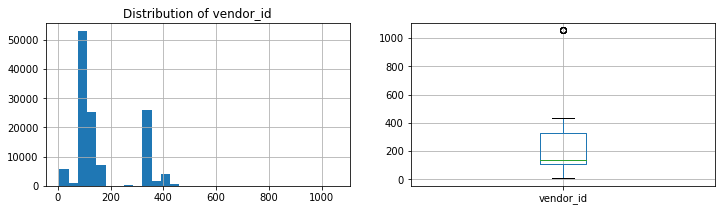

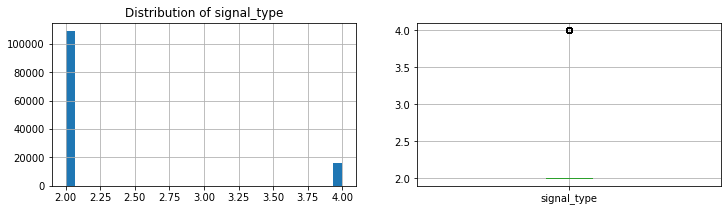

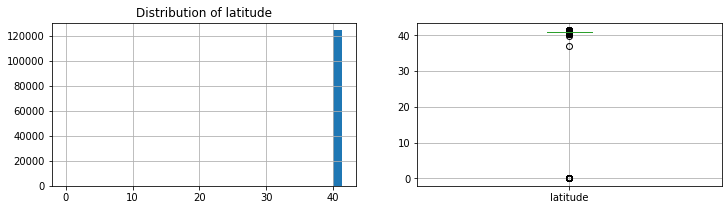

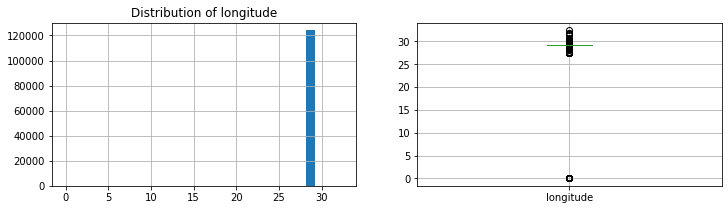

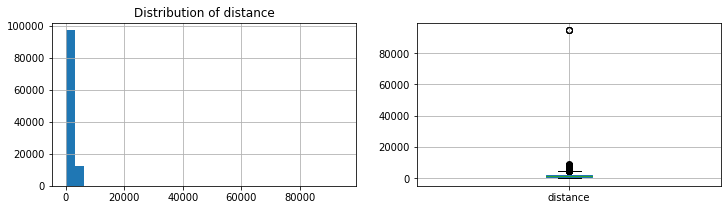

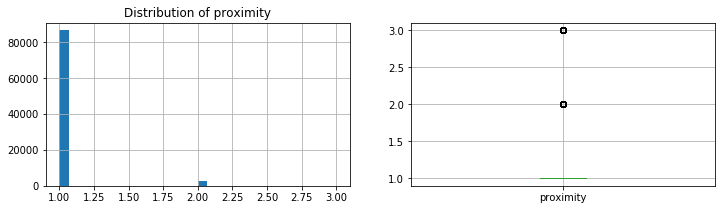

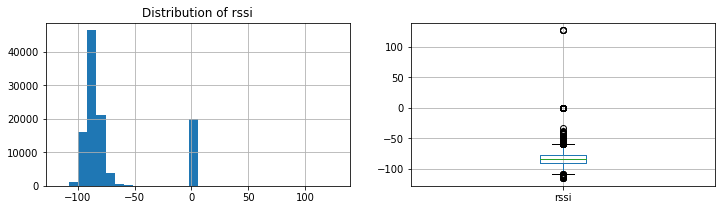

In [8]:

for col in df2.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 3))
    # our first chart is a histogram and we set the title 
    df2[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    df2.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()